In [1]:
import pandas as pd
import networkx as nx
import numpy as np
import pandas as pd
from joblib import Parallel, delayed
from multipledispatch import dispatch
from proteingraph import read_pdb
from proteingraph.pin import pdb2df,compute_rgroup_dataframe, compute_chain_pos_aa_mapping
from pyprojroot import here
from tqdm.auto import tqdm
from biopandas.pdb import PandasPdb

In [2]:
path = here() / "data/ghesquire_2011/models/A6NEC2.pdb"
atomic_df = PandasPdb().read_pdb(str(path)).df["ATOM"]
atomic_df["node_id"] = (
        atomic_df["chain_id"]
        + atomic_df["residue_number"].map(str)
        + atomic_df["residue_name"]
    )


In [ ]:
atomic_df['chain_id'].value_counts()
#atomic_df

In [ ]:
pdb_df = pdb2df(path)
rgroup_df = compute_rgroup_dataframe(pdb_df)
chain_pos_aa = compute_chain_pos_aa_mapping(pdb_df)

In [3]:
graph = read_pdb(path)

In [7]:
#list(graph.nodes())

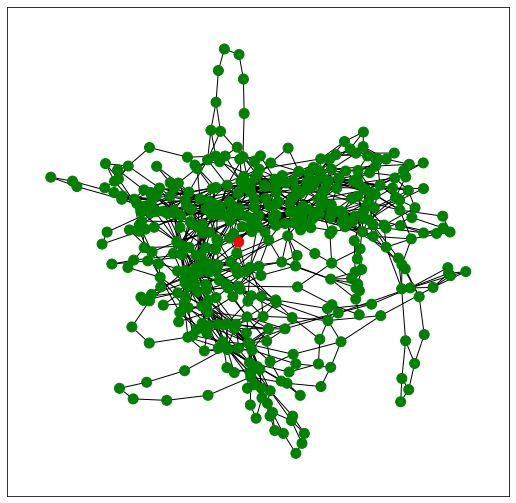

In [11]:
import networkx as nx
import matplotlib.pyplot as plt 
f, axs = plt.subplots(1,1,figsize=(9,9))
nx.draw_networkx(graph, with_labels=False,node_size=100, node_color = ['green' if '156MET' not in i else 'red' for i in list(graph.nodes())])
#

In [12]:
from patch_gnn.graph import extract_neighborhood

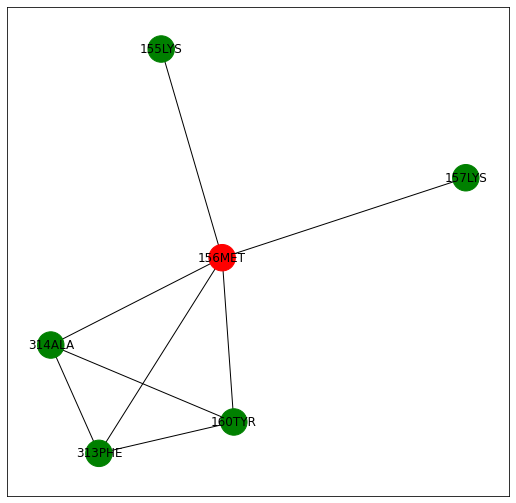

In [16]:
subgraph = extract_neighborhood(graph, '156MET', 1)
f, axs = plt.subplots(1,1,figsize=(9,9))
nx.draw_networkx(subgraph, with_labels=True,
                 node_size=700, 
                 node_color = ['green' if '156MET' not in i else 'red' for i in list(subgraph.nodes())])
#